# This assignment is a group work!!!
- Members: Shijia Gu(sg5718), Chang Du(cd2682), Hanxing Li(hl3282), Junru Lu(lj1230), Xiao Jing(xj655)
- Contributions: Everyone's contribution is equal as we came up with the idea and modified the demo codes by group discussion.

### IDEA: Customer are less likely than subscriber to choose biking for commuting
### NULL HYPOTHESIS: The proportion of suscriber biking on weekends is _the same_ or _higher_ than the proportion of customer biking on weekends
### ALTERNATIVE HYPOTHESIS: The proportion of suscriber biking on weekends is _lower_ than the proportion of customer biking on weekends
#### _$H_0$_ : $\frac{C_{\mathrm{weekend}}}{C_{\mathrm{total}}} - \frac{S_{\mathrm{weekend}}}{S_{\mathrm{total}}} <= 0 $
#### _$H_1$_ : $\frac{C_{\mathrm{weekend}}}{C_{\mathrm{total}}} - \frac{S_{\mathrm{weekend}}}{S_{\mathrm{total}}} > 0$
### Significance level: $\alpha=0.05$

In [1]:
from __future__  import print_function, division
import pandas as pd
import numpy as np
import os
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
"""
1.citibike csv file from Jan 2015, download and move data to PUIDATA
2.Simple bash commands can be run by preceding them with !, 
  but more complex command lines with variable arguments need to be build as strng and run with os.system
"""

def getCitiBikeCSV(datestring):
    """
    looks for existing files, download a file if none is there, unzips it, moves it
    """
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# i.e. df['starttime'] or as attributes: df.starttime. 
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [5]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [8]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'gender',
       'birth year'], axis=1, inplace=True)

In [11]:
df.head(5)

,usertype,date
0,Subscriber,2015-01-01 00:01:00
1,Subscriber,2015-01-01 00:02:00
2,Subscriber,2015-01-01 00:04:00
3,Subscriber,2015-01-01 00:04:00
4,Subscriber,2015-01-01 00:05:00


### Lets separate subscriber (_s) from customer (_c) to test the hypotheses.
### Lets plot the number of trips per week day

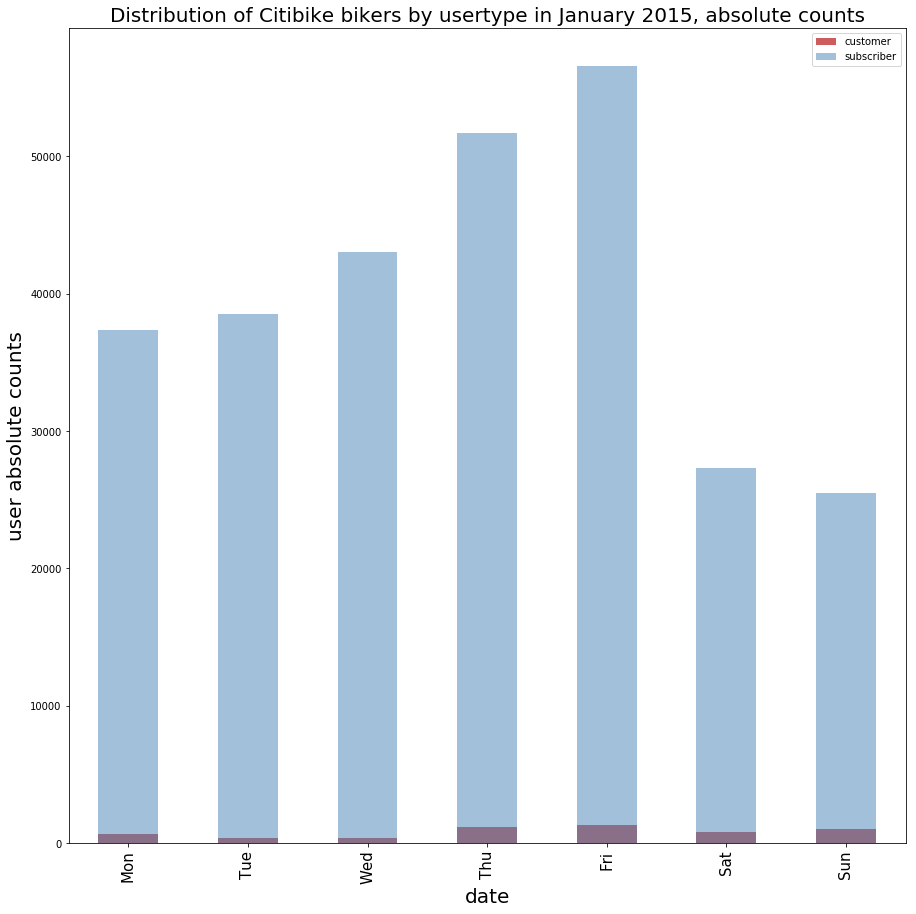

In [25]:
fig = pl.figure(figsize(15,15))

norm_c = 1
((df['date'][df['usertype'] == 'Customer'].
  groupby([df['date'].dt.weekday]).count()) / norm_c).plot(kind="bar", color='IndianRed', label='customer')

norm_s = 1
ax = ((df['date'][df['usertype'] == 'Subscriber'].
       groupby([df['date'].dt.weekday]).count()) / norm_s).plot(kind="bar", color='SteelBlue', alpha=0.5, label='subscriber')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=15)
pl.legend()
pl.xlabel("date", fontsize=20)
pl.ylabel("user absolute counts", fontsize=20)
pl.title("Distribution of Citibike bikers by usertype in January 2015, absolute counts", fontsize=20)

## Figure 1a: Distribution of Citibike bikers by usertype in January 2015, absolute counts

### Note: the counts have errors of course. what is the error on the count statistics? 
### for N counts the error is sqrt(N) - this is because counts follow a Poisson statistic

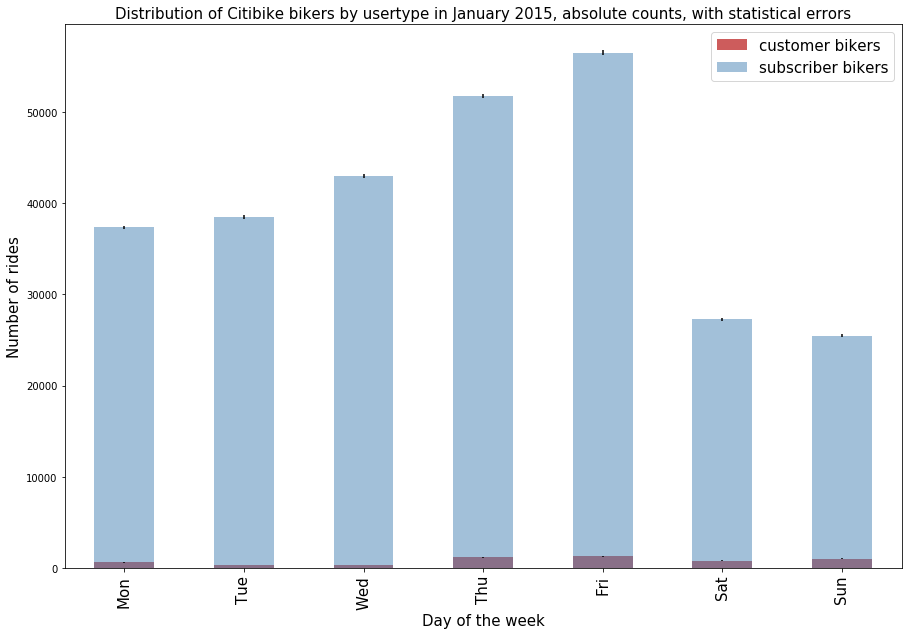

In [29]:
fig=pl.figure(figsize(15,10))

counts_c = df.date[df.usertype == 'Customer'].groupby([df.date.dt.weekday]).count()
norm_c = 1
error_c = np.sqrt(counts_c)
ax=((counts_c) / norm_c).plot(kind="bar",color='IndianRed', 
                              yerr=[((error_c) / norm_c, (error_c) / norm_c)], label='customer bikers')

counts_s = df.date[df.usertype == 'Subscriber'].groupby([df.date.dt.weekday]).count()
norm_s = 1
error_s = np.sqrt(counts_s)
((counts_s) / norm_s).plot(kind="bar", alpha=0.5, yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                           color='SteelBlue', label='subscriber bikers')

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=15)
ax.set_ylabel ("Number of rides", fontsize=15)
ax.set_xlabel ("Day of the week", fontsize=15)
pl.legend(['customer bikers','subscriber bikers'], fontsize=15)
pl.title("Distribution of Citibike bikers by usertype in January 2015, absolute counts, with statistical errors", 
         fontsize=15)

## Figure 1b: Distribution of Citibike bikers by usertype in January 2015, absolute counts, with statistical errors

Note: These are absolute numbers. It is very hard to compare absolute numbers. Ratios (or proportions) are more ameable to comparison, so let's _normalize_ the distribution of subscriber, and that of customer, i.e. devide them by the total number of rides for that usertype.(errorbars are normalized too!)

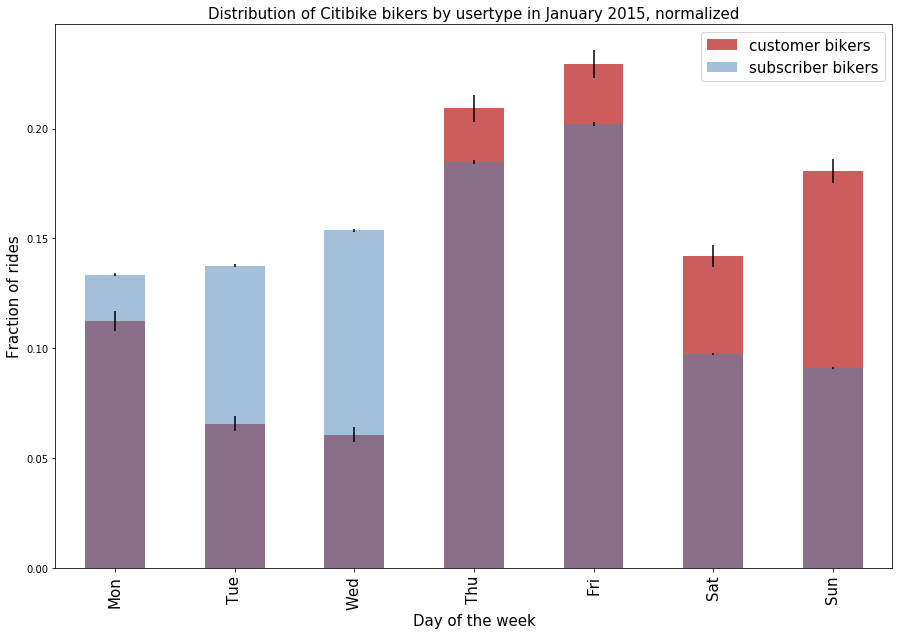

In [30]:
fig = pl.figure(figsize(15,10))

norm_c = counts_c.sum()
error_c = np.sqrt(counts_c)
((counts_c) / norm_c).plot(kind="bar", color='IndianRed', yerr=[((error_c) / norm_c, (error_c) / norm_c)], 
                           label='customer bikers')

norm_s = counts_s.sum()
ax = ((counts_s) / norm_s).plot(kind="bar", alpha=0.5, yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                                color='SteelBlue', label='subscriber bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=15)
ax.set_ylabel ("Fraction of rides", fontsize=15)
ax.set_xlabel ("Day of the week", fontsize=15)
pl.legend(['customer bikers','subscriber bikers'], fontsize=15)
pl.title("Distribution of Citibike bikers by usertype in January 2015, normalized", fontsize=15)

## Figure 2: Distribution of Citibike bikers by usertype in January 2015, normalized